# Nodes

Some text about what kind of nodes etc...


## Single Node

something about nodes in general...


In [68]:
from nipype import Node, Function

def add_two(x):
    return x + 2

addtwo = Node(Function(input_names=["x"],
                       output_names=["val"],
                       function=add_two),
              name='add_node')

In [69]:
addtwo.inputs.x = 4

In [70]:
res = addtwo.run()

In [71]:
res.outputs


val = 6

## IdentityInterface

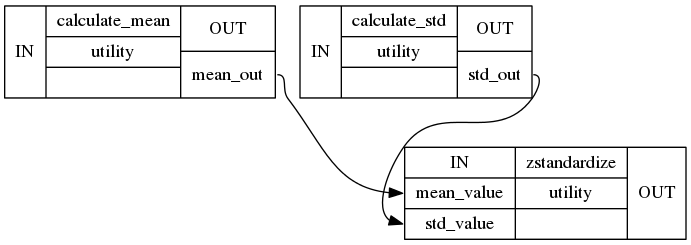

In [53]:
import numpy as np
from nipype import IdentityInterface

inputNode = Node(IdentityInterface(fields=["data"]), name="inputs_node")
someData = np.array([22, 23, 20, 26, 23, 23, 35, 22, 23, 25,
                     22, 26, 26, 50, 34, 49, 36, 24, 25, 34])
inputNode.inputs.data = someData


def calc_mean(data_in):
    return data_in.mean()

def calc_std(data_in):
    return data_in.std()

def zstandardize(data, mean_value, std_value):
    return (data - mean_value) / std_value

node1 = Node(Function(input_names=['data_in'],
                      output_names=['mean_out'],
                      function=calc_mean),
             name='calculate_mean')

node2 = Node(Function(input_names=['data_in'],
                      output_names=['std_out'],
                      function=calc_std),
             name='calculate_std')

node3 = Node(Function(input_names=['data', 'mean_value', 'std_value'],
                      output_names=['standard'],
                      function=zstandardize),
             name='zstandardize')

wf = Workflow(name='exampleflow')
wf.connect(inputNode, 'data', node1, 'data_in')
wf.connect(inputNode, 'data', node2, 'data_in')
wf.connect(inputNode, 'data', node3, 'data')
wf.connect(node1, 'mean_out', node3, 'mean_value')
wf.connect(node2, 'std_out', node3, 'std_value')
eg = wf.run()

wf.write_graph(graph2use='exec')
Image(filename='graph_detailed.dot.png')

## Function - simple node

In [67]:
def add_two(x):
    return x + 2

from nipype import Node, Function
addtwo = Node(Function(input_names=["x"],
                       output_names=["val"],
                       function=add_two),
              name='add_node')
addtwo.inputs.x = 4

res = addtwo.run()

res.outputs


val = 6

## Function - multiple nodes

In [32]:
import numpy as np
from nipype import Workflow, Node, Function

def demean(data1):
    return data1 - data1.mean()

def zeroThreshold(data2):
    return data2 >.astype('bool')


In [33]:
bla = np.array([1,2,3,4,5,6,7,8,9])

In [34]:
bla = demeanData(bla)

In [35]:
binarizeData(bla)

array([ True,  True,  True,  True, False,  True,  True,  True,  True], dtype=bool)

In [22]:


wf = Workflow(name='personflow')
node1 = Node(Function(input_names='person',
                      output_names='node1_out',
                      function=addFirstname),
             name='firstname_nod')
node2 = Node(Function(input_names='node2_in',
                      output_names='out',
                      function=addLastname),
             name='lastname_nod')
wf.connect(node1, 'node1_out', node2, 'node2_in')

node1.inputs.person = {'language': 'python'}

eg = wf.run()
wf.write_graph(graph2use='exec')

In [40]:
def calc_mean(data):
    return data.mean()

def calc_std(data):
    return data.std()

def zstandardize(data, mean_value, std_value):
    return (data - mean_value) / std_value

node1 = Node(Function(input_names=['data'],
                      output_names=['mean_out'],
                      function=calc_mean),
             name='calculate_mean')

node2 = Node(Function(input_names=['data'],
                      output_names=['std_out'],
                      function=calc_std),
             name='calculate_std')

someData = np.array([22, 23, 20, 26, 23, 23, 35, 22, 23, 25,
                     22, 26, 26, 50, 34, 49, 36, 24, 25, 34])
node1.inputs.data = someData
node2.inputs.data = someData


TypeError: __init__() takes at least 3 arguments (2 given)

In [ ]:

node3 = JoinNode(Function(input_names=['data3'],
                          output_names=['data_repeated'],
                          function=replicate),
                 name='replicate_data',
                 joinsource=node1,
                 joinfield=['data3'])

wf = Workflow(name='testjoin')
wf.connect(node1, 'data1', node2, 'data2')
wf.connect(node2, 'data_scaled', node3, 'data3')
eg = wf.run()

wf.write_graph(graph2use='exec')
Image(filename='graph_detailed.dot.png')

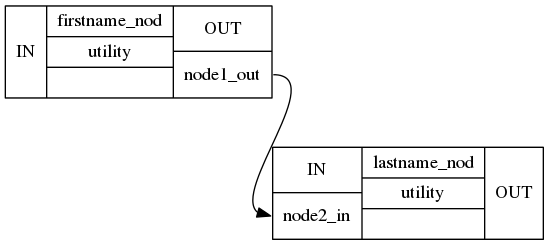

In [23]:
from IPython.display import Image
Image(filename='graph_detailed.dot.png')

In [ ]:
from nipype import Workflow, Node, MapNode, JoinNode
from nipype.interfaces.utility import Function

In [4]:
node1 = Node(name='name_node1')
node2 = Node(name='name_node2')
node3 = Node(name='name_node3')

wf = Workflow(name='exampleFlow')
wf.connect(node1, 'data1', node2, 'data2')
wf.connect(node1, 'data1', node2, 'data2')
wf.connect(node1, 'data1', node2, 'data2')
eg = wf.run()

TypeError: __init__() takes at least 3 arguments (2 given)

In [ ]:
wf.write_graph(graph2use='exec')
from IPython.display import Image
Image(filename='graph_detailed.dot.png')

In [3]:
from nipype import Workflow, Node, MapNode, JoinNode
from nipype.interfaces.utility import Function

## Two node JoinNode demonstration

The first node serves the _iterables_ and the second node aggregates and processes them. 

In [2]:
def get_data_from_id(id):
    import numpy as np
    return id + np.random.rand()

def merge_and_scale_data(data2):
    import numpy as np
    return (np.array(data2) * 1000).tolist()

node1 = Node(Function(input_names=['id'],
                      output_names=['data1'],
                      function=get_data_from_id),
             name='get_data')
node1.iterables = ('id', [1, 2, 3])

node2 = JoinNode(Function(input_names=['data2'],
                          output_names=['data_scaled'],
                          function=merge_and_scale_data),
                 name='scale_data',
                 joinsource=node1,
                 joinfield=['data2'])

wf = Workflow(name='testjoin')
wf.connect(node1, 'data1', node2, 'data2')
eg = wf.run()

INFO:workflow:['check', 'execution', 'logging']
INFO:workflow:Running serially.
INFO:workflow:Executing node get_data.aI.a0 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpYjlbfD/testjoin/_id_1/get_data
INFO:workflow:Executing node get_data.aI.a2 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpzTaPqW/testjoin/_id_3/get_data
INFO:workflow:Executing node get_data.aI.a1 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpM8ikjj/testjoin/_id_2/get_data
INFO:workflow:Executing node scale_data in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpzwphOX/testjoin/scale_data


In [3]:
res = [node for node in eg.nodes() if 'scale_data' in node.name][0].result

In [4]:
res.outputs


data_scaled = [1388.5030246509277, 2789.400910191879, 3625.4707467719486]

In [5]:
res.inputs

{'data2': [1.3885030246509278, 2.7894009101918793, 3.6254707467719487],
 'function_str': 'Vdef merge_and_scale_data(data2):\\u000a    import numpy as np\\u000a    return (np.array(data2) * 1000).tolist()\\u000a\n.',
 'ignore_exception': False}

In [6]:
eg.edges(data=True)

[(testjoin.get_data.aI.a1,
  testjoin.scale_data,
  {'connect': [('data1', 'data2J2')]}),
 (testjoin.get_data.aI.a2,
  testjoin.scale_data,
  {'connect': [('data1', 'data2J3')]}),
 (testjoin.get_data.aI.a0,
  testjoin.scale_data,
  {'connect': [('data1', 'data2J1')]})]

INFO:workflow:Creating detailed dot file: /software/temp/nipype-tutorial/temp/graph_detailed.dot
INFO:workflow:Creating dot file: /software/temp/nipype-tutorial/temp/graph.dot


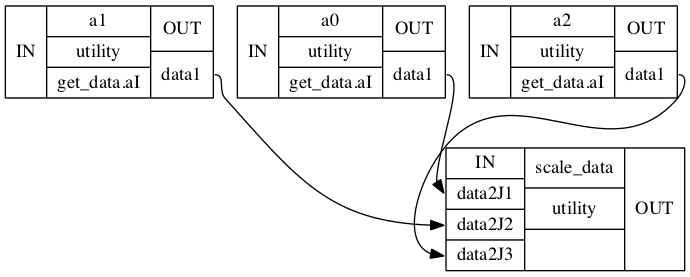

In [7]:
wf.write_graph(graph2use='exec')
from IPython.display import Image
Image(filename='graph_detailed.dot.png')

## Extending to multiple nodes

We extend the workflow by using three nodes. Note that even this workflow, the `joinsource` corresponds to the node containing _iterables_ and the `joinfield` corresponds to the input port of the `JoinNode` that aggregates the iterable branches. As before the graph below shows how the execution process is setup.

INFO:workflow:['check', 'execution', 'logging']
INFO:workflow:Running serially.
INFO:workflow:Executing node get_data.aI.a0 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpVGwMIU/testjoin/_id_1/get_data
INFO:workflow:Executing node scale_data.a0 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpPW8b8l/testjoin/_id_1/scale_data
INFO:workflow:Executing node get_data.aI.a2 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpX9Gzer/testjoin/_id_3/get_data
INFO:workflow:Executing node scale_data.a2 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmp659ckl/testjoin/_id_3/scale_data
INFO:workflow:Executing node get_data.aI.a1 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpu0cusF/testjoin/_id_2/get_data
INFO:workflow:Executing node scale_data.a1 in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmp6RK9kD/testjoin/_id_2/scale_data
INFO:workflow:Executing node replicate_data in dir: /var/folders/sm/488rz12j279_gyxrq7z971zw0000gn/T/tmpcgi

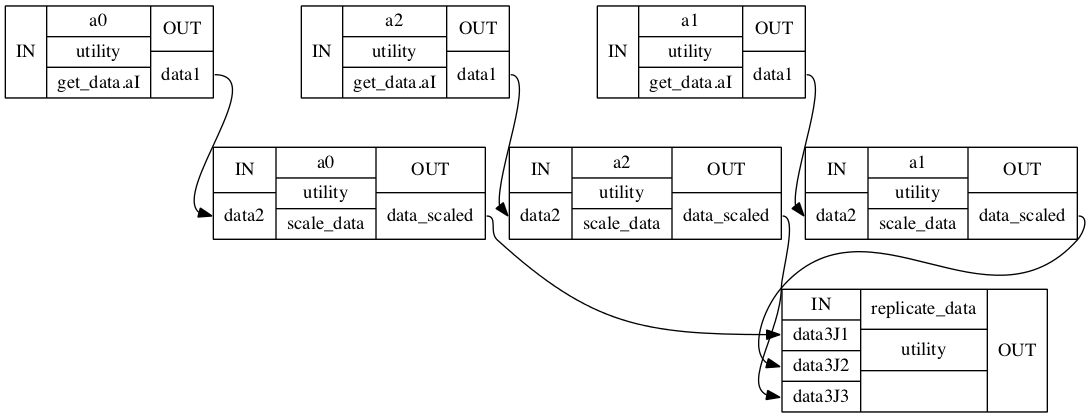

In [8]:
def get_data_from_id(id):
    import numpy as np
    return id + np.random.rand()

def scale_data(data2):
    import numpy as np
    return data2

def replicate(data3, nreps=2):
    return data3 * nreps

node1 = Node(Function(input_names=['id'],
                      output_names=['data1'],
                      function=get_data_from_id),
             name='get_data')
node1.iterables = ('id', [1, 2, 3])

node2 = Node(Function(input_names=['data2'],
                      output_names=['data_scaled'],
                      function=scale_data),
             name='scale_data')

node3 = JoinNode(Function(input_names=['data3'],
                          output_names=['data_repeated'],
                          function=replicate),
                 name='replicate_data',
                 joinsource=node1,
                 joinfield=['data3'])

wf = Workflow(name='testjoin')
wf.connect(node1, 'data1', node2, 'data2')
wf.connect(node2, 'data_scaled', node3, 'data3')
eg = wf.run()

wf.write_graph(graph2use='exec')
Image(filename='graph_detailed.dot.png')